C:\Users\ankit\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ankit\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ankit\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not conver


Best Parameters: {'C': 6.661399768153263, 'solver': 'newton-cg'}


C:\Users\ankit\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


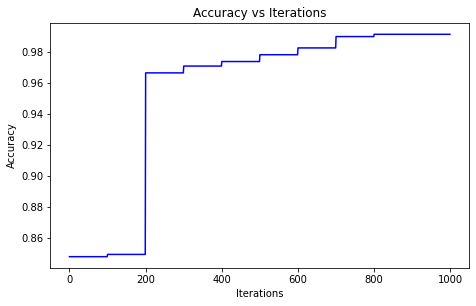

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("NHANES_age_prediction.csv")

iterations = 100
num_samples = 10
best_params = {}
best_accuracy = 0
all_accuracies = []

for sample in range(num_samples):
    train, test = train_test_split(dataset, test_size=0.3)
    X_train = train.drop('age_group', axis=1) 
    y_train = train['age_group']   
    X_test = test.drop('age_group', axis=1)  
    y_test = test['age_group']

    random_params = {
        'C': np.random.uniform(0, 10),  
        'solver': np.random.choice(['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']), 
    }
    model = LogisticRegression(**random_params, max_iter=iterations)
    model.fit(X_train, y_train)   
    accuracy_over_iterations = []
    for i in range(iterations):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_over_iterations.append(accuracy)
    
    all_accuracies.extend(accuracy_over_iterations)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = random_params
        best_convergence = model.coef_

print("\nBest Parameters:", best_params)
all_accuracies.sort()
plt.figure(figsize=(7.5, 4.5))
plt.plot(range(num_samples*iterations), all_accuracies, color='blue')

plt.title('Accuracy vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()